In [1]:
# Step 1: Importing necessary libraries
!pip install pandas numpy matplotlib seaborn scikit-learn xgboost

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from xgboost import XGBClassifier

Defaulting to user installation because normal site-packages is not writeable


In [4]:
# Step 2: Load the credit card fraud dataset
# Ensure the file path to the dataset is correct when running in your environment
df = pd.read_csv('cleaned_credit_card.csv')

In [5]:
# Step 3: Initial data exploration
print("First few rows of the dataset:")
print(df.head())

print("\nMissing values check:")
missing_values = df.isnull().sum()
print(f"Missing values:\n{missing_values}")

print("\nBasic statistics of the dataset:")
print(df.describe())

First few rows of the dataset:
       Time        V1        V2        V3        V4        V5        V6  \
0 -1.996583 -0.694242 -0.044075  1.672773  0.973366 -0.245117  0.347068   
1 -1.996583  0.608496  0.161176  0.109797  0.316523  0.043483 -0.061820   
2 -1.996562 -0.693500 -0.811578  1.169468  0.268231 -0.364572  1.351454   
3 -1.996562 -0.493325 -0.112169  1.182516 -0.609727 -0.007469  0.936150   
4 -1.996541 -0.591330  0.531541  1.021412  0.284655 -0.295015  0.071999   

         V7        V8        V9  ...       V21       V22       V23       V24  \
0  0.193679  0.082637  0.331128  ... -0.024923  0.382854 -0.176911  0.110507   
1 -0.063700  0.071253 -0.232494  ... -0.307377 -0.880077  0.162201 -0.561131   
2  0.639776  0.207373 -1.378675  ...  0.337632  1.063358  1.456320 -1.138092   
3  0.192071  0.316018 -1.262503  ... -0.147443  0.007267 -0.304777 -1.941027   
4  0.479302 -0.226510  0.744326  ... -0.012839  1.100011 -0.220123  0.233250   

        V25       V26       V27      

In [6]:
# Step 4: Data cleaning
# Check for duplicates and remove them
df = df.drop_duplicates()

In [7]:
# Step 5: Feature scaling
# Extracting the feature columns and the target variable (Class)
X = df.drop('Class', axis=1)
y = df['Class']

# Standardize the features (mean=0, variance=1) using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

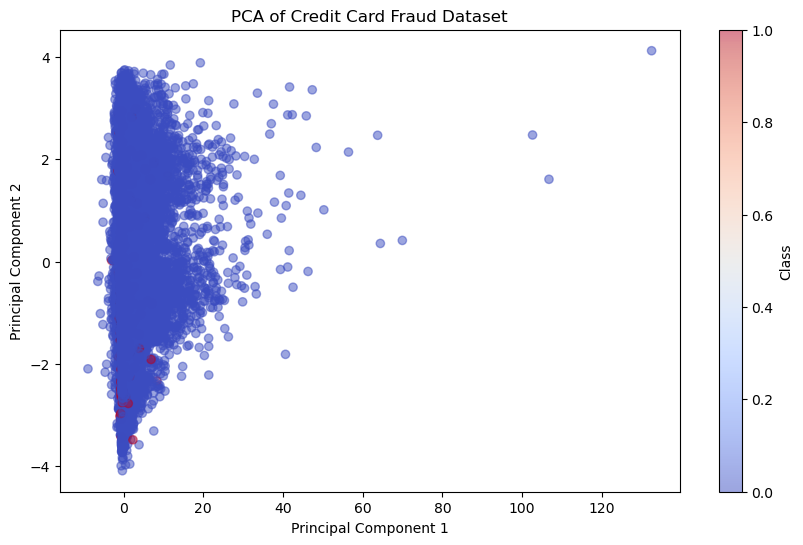

In [8]:
# Step 6: Feature Engineering - PCA (Principal Component Analysis)
# Reducing the number of features using PCA to explain variance in a reduced number of components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualize the first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', alpha=0.5)
plt.title('PCA of Credit Card Fraud Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Class')
plt.show()


In [9]:
# Step 7: Data Splitting for Model Training
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

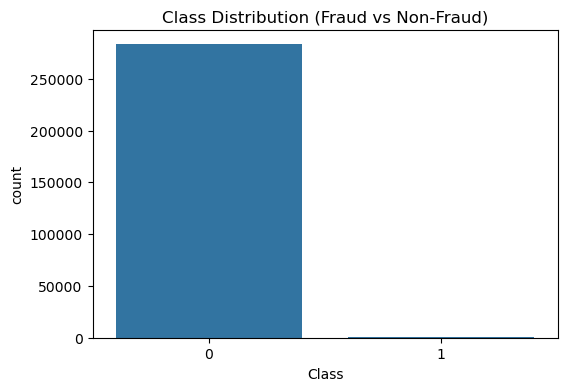

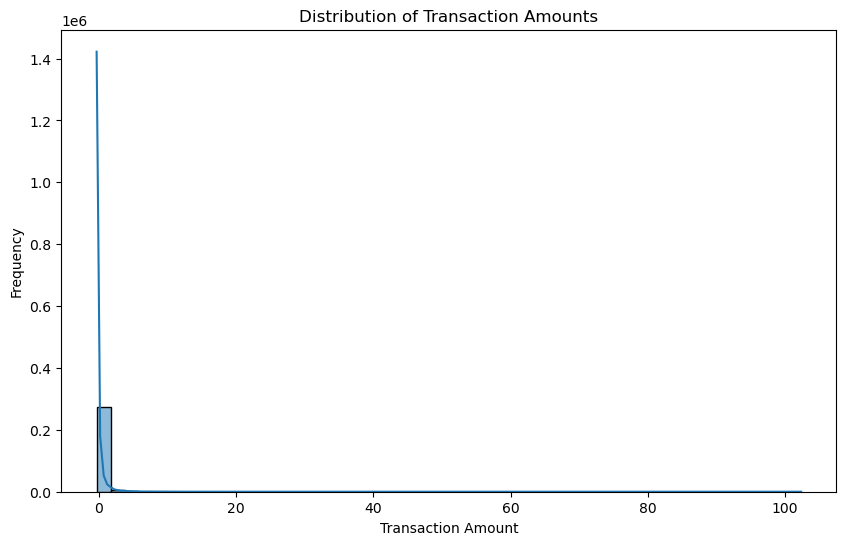

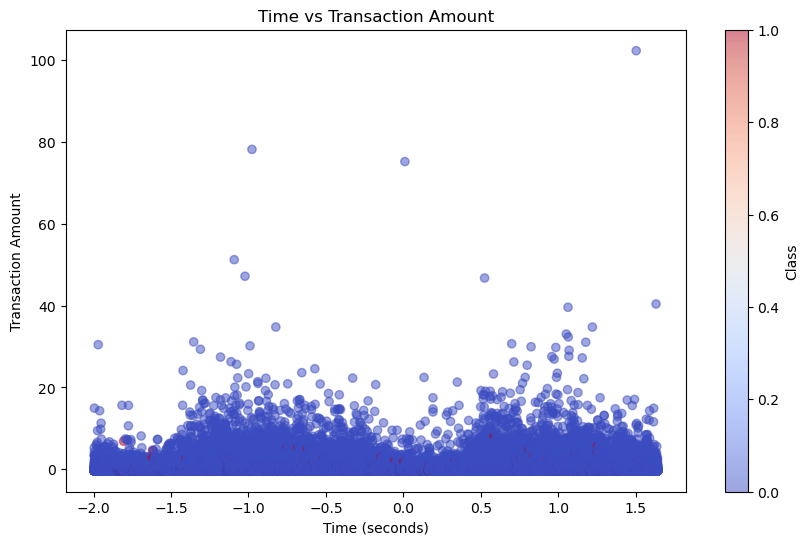

In [10]:
# Step 8: Exploratory Data Analysis (EDA)
# Class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution (Fraud vs Non-Fraud)')
plt.show()

# Transaction Amount Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

# Time vs Amount Scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(df['Time'], df['Amount'], c=df['Class'], cmap='coolwarm', alpha=0.5)
plt.title('Time vs Transaction Amount')
plt.xlabel('Time (seconds)')
plt.ylabel('Transaction Amount')
plt.colorbar(label='Class')
plt.show()


Logistic Regression Accuracy: 0.9991
Logistic Regression ROC-AUC Score: 0.9549

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.85      0.59      0.70        95

    accuracy                           1.00     56746
   macro avg       0.92      0.79      0.85     56746
weighted avg       1.00      1.00      1.00     56746

Logistic Regression Confusion Matrix:
[[56641    10]
 [   39    56]]


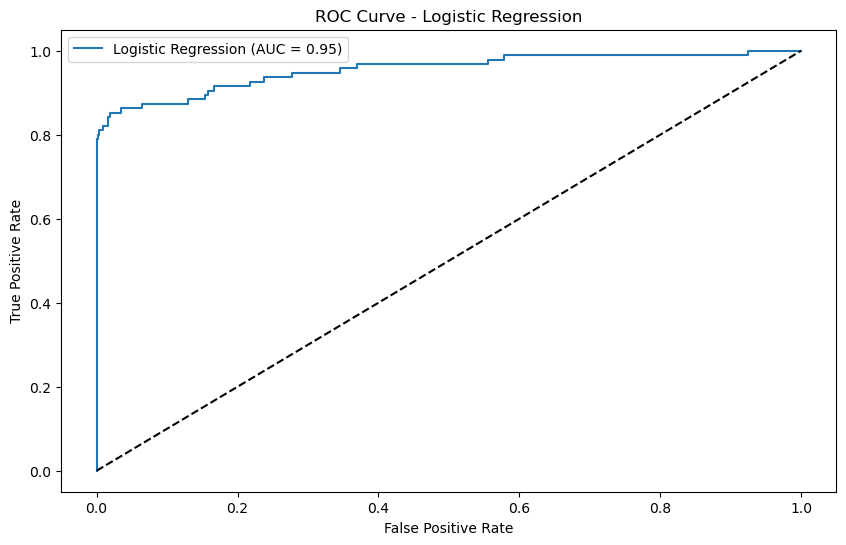

In [11]:
# Model Development

# Step 9: Logistic Regression Model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

# Evaluate Logistic Regression
y_pred_logreg = logreg.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
roc_auc_logreg = roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])

print(f"\nLogistic Regression Accuracy: {accuracy_logreg:.4f}")
print(f"Logistic Regression ROC-AUC Score: {roc_auc_logreg:.4f}")
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))

# Confusion Matrix for Logistic Regression
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg))

# Plot ROC Curve for Logistic Regression
fpr, tpr, _ = roc_curve(y_test, logreg.predict_proba(X_test)[:, 1])
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc_logreg:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve - Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()

C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [16:10:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Accuracy: 0.9995
XGBoost ROC-AUC Score: 0.9709

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.96      0.75      0.84        95

    accuracy                           1.00     56746
   macro avg       0.98      0.87      0.92     56746
weighted avg       1.00      1.00      1.00     56746

XGBoost Confusion Matrix:
[[56648     3]
 [   24    71]]


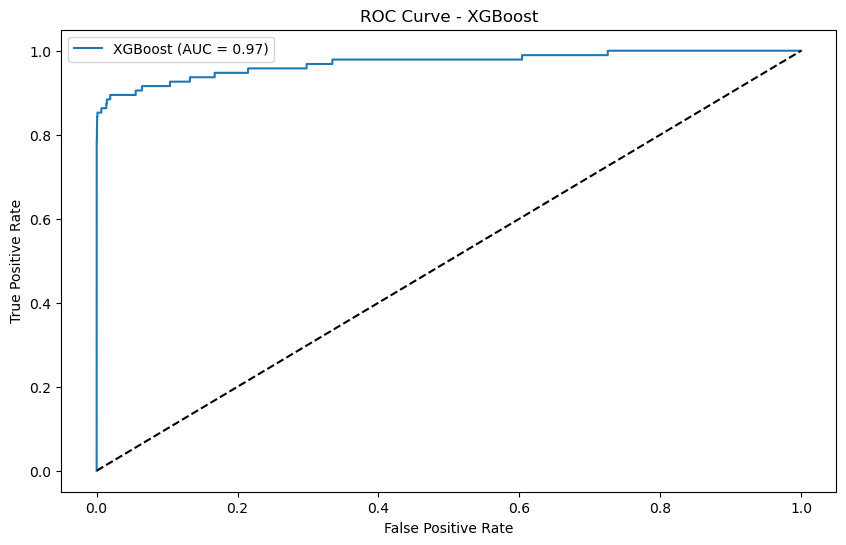

In [12]:
# Step 10: XGBoost Model
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Evaluate XGBoost
y_pred_xgb = xgb_model.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])

print(f"\nXGBoost Accuracy: {accuracy_xgb:.4f}")
print(f"XGBoost ROC-AUC Score: {roc_auc_xgb:.4f}")
print("\nXGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

# Confusion Matrix for XGBoost
print("XGBoost Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

# Plot ROC Curve for XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(10, 6))
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve - XGBoost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()

In [13]:
# Step 11: Summary Statistics
total_transactions = df.shape[0]
fraud_transactions = df[df['Class'] == 1].shape[0]
non_fraud_transactions = df[df['Class'] == 0].shape[0]

print(f"\nTotal Transactions: {total_transactions}")
print(f"Fraudulent Transactions: {fraud_transactions}")
print(f"Non-Fraudulent Transactions: {non_fraud_transactions}")



Total Transactions: 283726
Fraudulent Transactions: 473
Non-Fraudulent Transactions: 283253
